[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/main?filepath=notebooks%2FAula_18_a_Redes_Neurais_com_TensorFlow.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_18_a_Redes_Neurais_com_TensorFlow.ipynb)

# Redes Neurais com TensorFlow

**Objetivos**: Aprender Redes Neurais Artificiais (RNA) usando a biblioteca `TensorFlow`.

## TensorFlow e Keras

[**TensorFlow**](https://www.tensorflow.org/) é uma biblioteca de código aberto para aprendizado de máquina aplicável a uma ampla variedade de tarefas. Foi criada pelo **Google** em 2015 é a principal biblioteca para criação e treinamento de redes neurais artificiais. A API toda é escrita em Python mas é executada em C++ na CPU ou em CUDA na GPU.

[**Keras**](https://keras.io/) é uma biblioteca de código aberto para fácil criação e treinamento de redes neurais artificiais. Projetado para permitir experimentação rápida com redes neurais profundas, ele se concentra em ser fácil de usar, modular e extensível. Em 2017, a equipe do **TensorFlow** decidiu apoiar o Keras na biblioteca principal do **TensorFlow**.

## O que é uma Rede Neural Artificial?

Redes neurais artificiais (RNAs) são modelos computacionais inspirados pelo sistema nervoso central (em particular o cérebro) que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. Redes neurais artificiais geralmente são apresentadas como sistemas de "neurônios interconectados, que podem computar valores de entradas", simulando o comportamento de redes neurais biológicas.

<img src="images/redes_neurais.jpeg" alt="redes neurais" style="width: 500px;"/>

## Como a rede neural aprende?

Em cada neurônio há uma função de ativação (*activation function*) que processa uma combinação linear entre inputs e pesos sinápticos, gerando assim um sinal de saída.

A informação flui da *input layer* para as *hidden layers* e por fim para a *output layer*. Nesse fluxo os inputs de dados da *input layer* são alimentados para os neurônios das *hidden layers* que por fim alimentam o neurônio final da *output layer*.

A primeira passada de informação (propagação) pela rede é geralmente feita com parâmetros aleatórios para as funções de ativação dos neurônios.

Ao realizar a propagação, chamada de *feed forward*, temos sinais de saídas nos neurônios da output layer. 

No fim da propagação, a função custo (uma métrica de erro) é calculada e o modelo então ajusta os parâmetros dos neurônios na direção de um menor custo (por meio do gradiente - derivada multivariada).

Assim uma nova propagação é gerada e a numa nova função custo e calculada. Assim como é realizado a atualização dos parâmetros dos neurônios.

O nome desse algoritmo é **Retro-propagação** (*Backpropagation*). E cada vez que ele é executado denomina-se como época (*epoch*). E quandos as épocas estabelecidas se encerram, a rede neural encerra o seu treinamento/aprendizagem.

<img src="images/backpropagation.gif" alt="backpropagation" style="width: 500px;"/>

## Funções de Ativação

| **Sigmoid**                                                  | **Tanh**                                                     | **ReLU**                                                     | **Leaky ReLU**                                               |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| $g(z)=\frac{1}{1+e^{-z}}$                                    | $g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$                     | $g(z)=\max (0, z)$                                           | $\begin{array}{c}{g(z)=\max (\epsilon z, z)} \\ {\text { com } \epsilon \ll 1}\end{array}$ |
| ![Illustration](images/sigmoid.png) | ![Illustration](images/tanh.png) | ![Illustration](images/relu.png) | ![Illustration](images/leaky-relu.png) |



## Algoritmos de Otimização

Keras possui diversos:
* **SGD**: _**S**tochastic **G**radient **D**escent_
* **SGD com Momento**: SGD com Momento usando a derivada (ou gradiente) do ponto atual
* **SGD com Momento Nesterov**: SGD com Momento mas  usa a derivada (ou o gradiente) parcial do ponto seguinte (Nesterov, 1983)
* **RMSprop**: SGD com taxa de aprendizagem adaptativa  (Hinton, Srivastava & Swersky, 2012) -- `RMSProp`
* **AdaGrad**: SGD com taxa de aprendizagem adaptativa (Duchi, Hazan, & Yoram, 2011) --  `AdaGrad`
* **Adam**: SGD com taxa de aprendizagem adaptativa e momento (Kingma, Diederick & Jimmy, 2014) --- `ADAM`

Os mais importantes são o SGD e o Adam

### SGD - Stochastic Gradient Descent

[`tf.keras.optimizers.SGD()`](https://keras.io/api/optimizers/sgd/):

* `learning_rate=0.01` - Taxa de Aprendizagem $\eta > 0$
* `momentum=0.0` - hyperparâmetro $\geq 0$ que acelera o *gradient descent* na direção relevante e mitiga oscilações. 
* `nesterov=False` - `bool` para se aplica *Nesterov Momentum* ou não. *Nesterov Momentum* usa posições intermediárias do gradiente no cálculo do *momentum*. Proposto por Yuri Nesterov em 1983.
    

### Momentum

<img src="images/momentum.gif" alt="momentum" style="width: 300px;"/>

### Adam

Adam é um método de SGD que usa uma estimativa adaptativa dos momentos de primeira ordem e momentos de segunda ordem. Proposto por Kingma & Ba (2014).

[`tf.keras.optimizers.Adam()`](https://keras.io/api/optimizers/adam/):

* `learning_rate=0.001` - Taxa de Aprendizagem $\eta > 0$. Valor padrão menor que o do `SGD()`.
* `beta_1=0.9` - O decrescimento exponencial da estimativa dos momentos de primeira ordem.
* `beta_2=0.999` - O decrescimento exponencial da estimativa dos momentos de segunda ordem.    

### Momentum

<img src="images/comparacao_otimizadores.gif" alt="comparacao_otimizadores" style="width: 500px;"/>

### Momentum

<img src="images/opt1.gif" alt="comparacao_otimizadores_2" style="width: 500px;"/>

### Momentum

<img src="images/opt2.gif" alt="comparacao_otimizadores_3" style="width: 500px;"/>

## Funções Custo

As funções custos se dividem em dois tipos:

1. Funções Custo de **Classificação**
2. Funções Custo de **Regressão**

### Funcões Custo de Classificação

Mais utilizadas


* *Binary Cross-entropy* (Entropia cruzada binária): [`tf.keras.losses.BinaryCrossentropy()`](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class)
* *Categorical Cross-entropy* (Entropia cruzada categórica): [`tf.keras.losses.CategoricalCrossentropy()`](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)

### Funcões Custo de Regressão

Mais utilizadas
* MSE - *Mean Squared Error* (Erro quadrado médio): [`tf.keras.losses.MeanSquaredError()`](https://keras.io/api/losses/regression_losses/#meansquarederror-class)
* MAE - *Mean Absolute Error* (Erro absoluto médio): [`tf.keras.losses.MeanAbsoluteError()`](https://keras.io/api/losses/regression_losses/#meanabsoluteerror-class)

## Como construir sua rede neural no Keras

Construir redes neurais com o **Keras** é muito fácil.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

### Exemplo de Classificação Binária

In [2]:
model = keras.models.Sequential()  # Cria uma rede neural sequencial - feed foward
model.add(keras.layers.Dense(20, activation='relu', input_shape=(20, 1))) # primeira hidden layer
model.add(keras.layers.Dense(20, activation='LeakyReLU')) # segunda hidden layer
model.add(keras.layers.Dense(1, activation= 'sigmoid')) # output layer com ativação sigmoid

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20, 20)            40        
_________________________________________________________________
dense_1 (Dense)              (None, 20, 20)            420       
_________________________________________________________________
dense_2 (Dense)              (None, 20, 1)             21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


### Exemplo de Regressão

In [3]:
model = keras.models.Sequential()  # Cria uma rede neural sequencial - feed foward
model.add(keras.layers.Dense(20, activation='relu', input_shape=(20, 1))) # primeira hidden layer
model.add(keras.layers.Dense(20, activation='LeakyReLU')) # segunda hidden layer
model.add(keras.layers.Dense(1, activation= 'linear')) # output layer com ativação linear

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20, 20)            40        
_________________________________________________________________
dense_4 (Dense)              (None, 20, 20)            420       
_________________________________________________________________
dense_5 (Dense)              (None, 20, 1)             21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


### Exemplo de Multiclassificação (não-binária - acima de duas classes)

In [4]:
model = keras.models.Sequential()  # Cria uma rede neural sequencial - feed foward
model.add(keras.layers.Dense(20, activation='relu', input_shape=(20, 1))) # primeira hidden layer
model.add(keras.layers.Dense(20, activation='LeakyReLU')) # segunda hidden layer
model.add(keras.layers.Dense(100, activation= 'softmax')) # output layer com ativação softmax com 10 classes

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20, 20)            40        
_________________________________________________________________
dense_7 (Dense)              (None, 20, 20)            420       
_________________________________________________________________
dense_8 (Dense)              (None, 20, 100)           2100      
Total params: 2,560
Trainable params: 2,560
Non-trainable params: 0
_________________________________________________________________


## Como treinar sua rede neural no Keras

Uma vez especificado o modelo, ele deve ser compilado com o comando `model.compile()` no qual deve se especificar a função custo `loss`, o otimizador `optimizer` e as métricas `metrics` como lista

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(),
             metrics=[keras.metrics.Accuracy()])

## Como ajustar o treinamento sua rede neural no Keras

* Batch Size
* Dropout
* Early Stopping

### Batch Size

Tamanho do Batch de dados que passa por vez pela rede neural antes da atualização dos parâmetros pelo *backpropagation*. Tamanhos grandes resultam em instabilidade no treinamento. Geralmente usam-se potências de $2$ $(2,4,8,16,\dots, 2^n)$.

Em Abril de 2018, Yann LeCun, um dos principais pesquisadores sobre redes neurais e ganhador do "nobel" da computação (Prêmio Turing) [twittou](https://twitter.com/ylecun/status/989610208497360896) em resposta à Masters & Luschi (2018) que mostrava diversos contextos de *batch size*:

>"Friends don't let friends use mini-batches larger than 32"

Então 32 é um valor empiricamente verificado que dá estabilidade ao treinamento.

> Dominic Masters and Carlo Luschi. "Revisiting small batch training for deep neural networks." _arXiv preprint arXiv:1804.07612_ (2018).

### Dropout

Uma medida de regularização na qual evita-se overfitting proposta por Hinton em 2012. *Dropout* é um algoritmo que especifica que a cada iteração de época do treino os neurônios possuem uma probabilidade de serem removidos (não utilizados) para a aprendizagem. Geralmente a probabilidade ideal fica em torno de 20% ($0.2$).

Coloca-se como se fosse uma camada após a camada que deseja aplicar o dropout:

```python
model.add(keras.layers.Dense(4, activation='relu'))  # hidden layer
model.add(keras.layers.Dropout(0.2))                 # dropout layer
```

<img src="images/dropout.gif" alt="dropout" style="width: 500px;"/>

### *Early Stopping* (Parada Precoce)

Usar *Early Stopping* significa que, no final de cada época, devemos calcular o erro da rede. Se ele não diminuir significativamente após $n$ épocas, o treinamento é interrompido e a rede utiliza os parâmetros aprendidos até o ponto de interrupção.

É um `callback` especificado durante o treino

* [`tf.keras.callbacks.EarlyStopping()`](https://keras.io/api/callbacks/early_stopping/)
    * `monitor='val_loss'` - métrica a monitorar
    * `patience=N` - número de épocas a esperar até não conseguir nenhum aprimoramento para interrupção do treinamento

Após isso é só treinar o modelo com `model.fit(X_train, y_train)` especificando o número de épocas `epochs`, tamanho do batch `batch_size` e dados de validação `validation_data`.

```python
history  = model.fit(X_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(X_test, y_test),
                     callbacks=[keras.callbacks.EarlyStopping(
                         monitor='val_loss',
                         patience=3)])
```

## Visualizando o avanço do treinamento

```python
# Plot acurácia de treino e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot custo de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```

## Exemplo com o dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

>Obs: usar `random_state = 123`

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [7]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (535, 4)
Tamanho de X_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


In [8]:
model = keras.models.Sequential()  # Cria uma rede neural sequencial - feed foward
model.add(keras.layers.Dense(4, activation='relu', input_shape=X_train[0].shape)) # primeira hidden layer
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation= 'sigmoid')) # output layer com ativação sigmoid

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss=keras.losses.binary_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [10]:
batch_size = 32  # X_train 535 / 32 = 16.71 (então são 17 batches de 32)
epochs = 100

history  = model.fit(X_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 20.5455 - accuracy: 0.5664 - val_loss: 14.0240 - val_accuracy: 0.6034
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 19.1556 - accuracy: 0.5626 - val_loss: 13.1088 - val_accuracy: 0.6034
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 18.7690 - accuracy: 0.5757 - val_loss: 12.2278 - val_accuracy: 0.6034
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 17.3987 - accuracy: 0.5645 - val_loss: 11.3958 - val_accuracy: 0.6034
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 16.0133 - accuracy: 0.5738 - val_loss: 10.6085 - val_accuracy: 0.6034
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 16.4447 - accuracy: 0.5477 - val_loss: 9.8426 - val_accuracy: 0.6034
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 14.0243 - accuracy: 0.5551 - val_loss: 9.1506 - val_accuracy: 0.6034
E

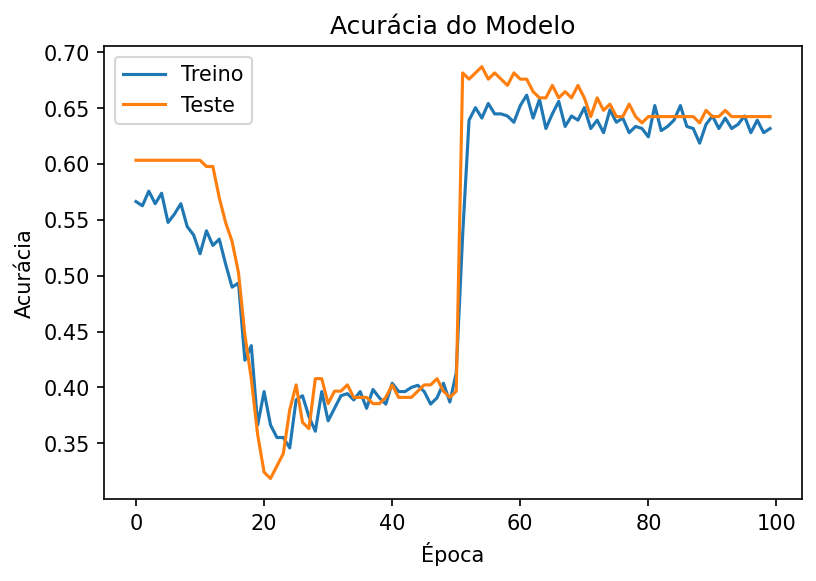

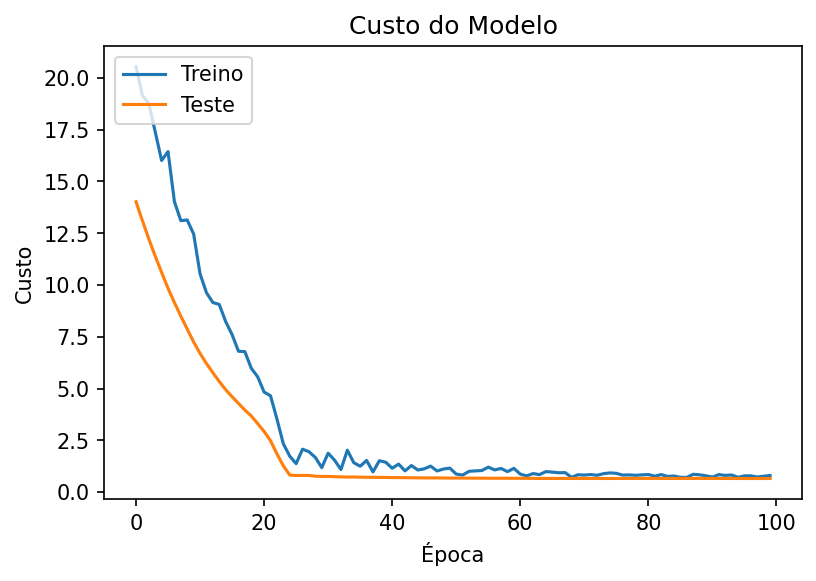

In [11]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

# Plot acurácia de treino e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

# Plot custo de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

### Acurácia do Modelo

Usar o comando `model.evaluate()`

Para a métrica acurácia, retorna um score de acurácia `float` entre $0$ e $1$
    
> Obs: Regressão Logística acurácias: 0.69 Treino e 0.7 Teste

> Obs: *Support Vector Machines* acurácias: 0.79 Treino e 0.75 Teste

> Obs: Árvores de Decisão acurácias: 0.79 Treino e 0.79 Teste

> Obs: Florestas Aleatórias acurácias: 0.84 Treino e 0.82 Teste

In [12]:
model.evaluate(X_test, y_test)

# X_test 179 / 32 = 5.59 (então são 6 batches de 32)

6/6 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6425


[0.6576788425445557, 0.6424580812454224]

## Fazer previsões com o modelo

* `model.predict(X_new)` para obter uma probabilidade `float` entre $0$ e $1$
* `(model.predict(X_new) > 0.5).astype("int32")` para obter um `int` $0$ ou $1$ representando a classe (Classificação Binária)
* `np.argmax(model.predict(X_new), axis=-1)` para obter um `int` representando a classe (Classificação Multiclasse)

In [13]:
(model.predict(X_test) > 0.5).astype('int32')

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Referências

* Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.
* Kingma, Diederik P., and Jimmy Ba. “Adam: A Method for Stochastic Optimization,” December 22, 2014. https://arxiv.org/abs/1412.6980.
* Nesterov, Y. A method of solving a convex programming problem with convergence rate O(1/sqr(k)). Soviet Mathematics Doklady, 27:372–376, 1983.
* Srivastava, Nitish, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. “Dropout: A Simple Way to Prevent Neural Networks from Overfitting.” Journal of Machine Learning Research 15, no. 56 (2014): 1929–58.